# Importing the required Libraries

In [1]:
# For performing various data analysis operations
import numpy as np
import pandas as pd

# For splitting the dataset into training & testing dataset
from sklearn.model_selection import train_test_split

# To Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# SVM
from sklearn import svm

# For implementing various metrics to test the accuracy of our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# To get random values
import random

# Import the dataset

In [2]:
data = pd.read_csv("IMDB-Movie-Data.csv")
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Analysis  

In [3]:
data.shape

(839, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

In [5]:
data.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
834,995.0,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012.0,88.0,6.70000,164088.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.50000,73152.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.20000,70699.0000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1000.0,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016.0,87.0,5.30000,12435.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.81432,193230.2518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
count,838.000000,838.00000,838.000000,839.00000,8.390000e+02,839.000000,838.000000,838.000000,838.000000,838.000000,...,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.81432,1.932303e+05,84.564558,59.575179,0.330549,0.291169,0.053699,...,0.023866,0.005967,0.102625,0.143198,0.127685,0.017900,0.176611,0.011933,0.004773,0.177804
std,286.572065,3.17236,18.470922,0.87723,1.929838e+05,104.457845,16.952416,0.470692,0.454573,0.225558,...,0.152724,0.077059,0.303650,0.350484,0.333938,0.132666,0.381567,0.108650,0.068965,0.382576
min,1.000000,2006.00000,66.000000,1.90000,1.780000e+02,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.250000,2010.00000,101.000000,6.30000,6.145500e+04,13.975000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,475.500000,2013.00000,112.000000,6.90000,1.371170e+05,48.240000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,729.750000,2015.00000,124.000000,7.50000,2.708650e+05,116.730000,72.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,2016.00000,187.000000,9.00000,1.791916e+06,936.630000,100.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.isnull().sum()

Rank                  1
Title                 1
Genre                 1
Description           1
Director              1
Actors                1
Year                  1
Runtime (Minutes)     1
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             1
Action                1
Adventure             1
Aniimation            1
Biography             1
Comedy                1
Crime                 1
Drama                 1
Family                1
Fantasy               1
History               1
Horror                1
Music                 1
Musical               1
Mystery               1
Romance               1
Sci-Fi                1
Sport                 1
Thriller              1
War                   1
Western               1
Success               1
dtype: int64

In [8]:
data.drop(data.tail(1).index, inplace = True)

In [9]:
data.shape

(838, 33)

In [10]:
data.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
Action                0
Adventure             0
Aniimation            0
Biography             0
Comedy                0
Crime                 0
Drama                 0
Family                0
Fantasy               0
History               0
Horror                0
Music                 0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Sport                 0
Thriller              0
War                   0
Western               0
Success               0
dtype: int64

# Data Visualization

In [11]:
data = data.rename(columns = {'Revenue (Millions)':'Revenue_Millions'})
data = data.rename(columns = {'Runtime (Minutes)':'Runtime_Minutes'})

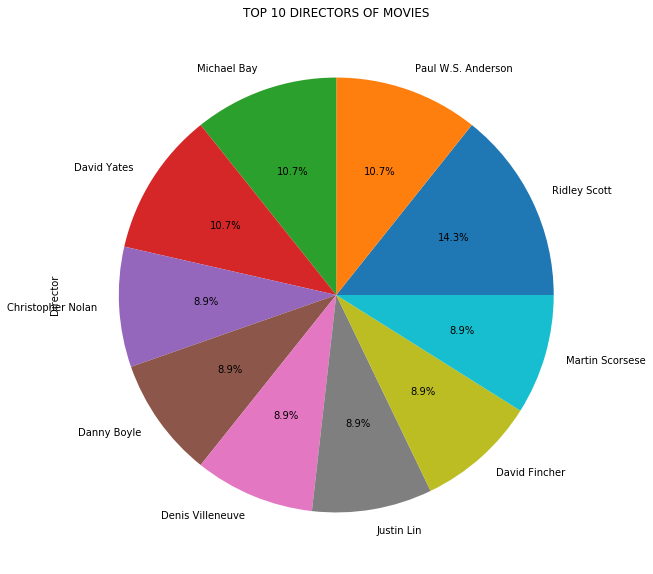

In [12]:
# Director Analysis
data.Director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize = (10,10))
plt.title('TOP 10 DIRECTORS OF MOVIES')
plt.show()

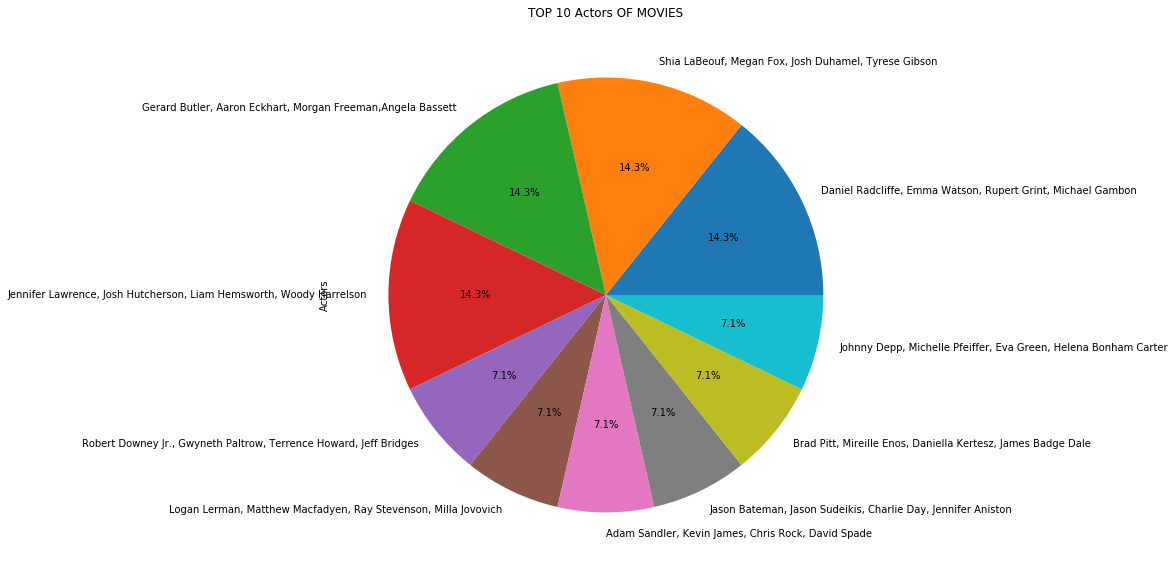

In [13]:
#ACTOR ANALYSIS
data.Actors.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('TOP 10 Actors OF MOVIES')
plt.show()

 RATING BASED ON YEAR


<function matplotlib.pyplot.show(*args, **kw)>

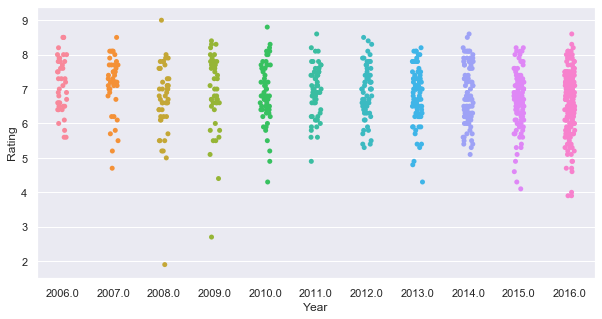

In [14]:
# Year Analysis
sns.set(rc={'figure.figsize':(10,5)})
sns.stripplot(x="Year", y="Rating", data=data, jitter=True);
print(' RATING BASED ON YEAR')
plt.show

 VOTES BASED ON YEAR


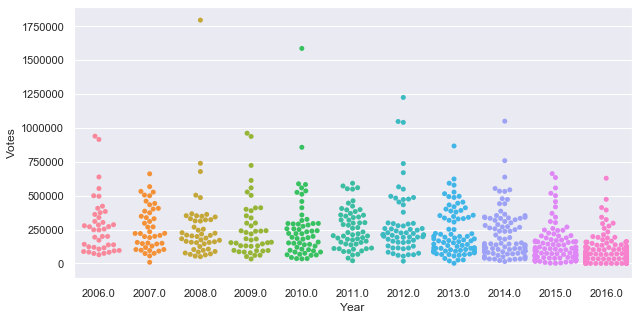

In [15]:
# VOTES BASED ON YEAR
sns.swarmplot(x="Year", y="Votes", data=data);
print(' VOTES BASED ON YEAR')

 REVENUE BASED ON YEAR


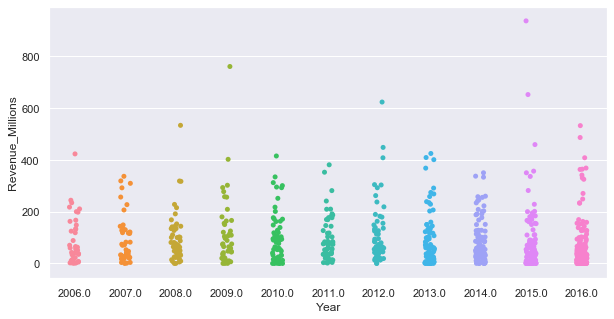

In [16]:
# REVENUE BASED ON YEAR
sns.stripplot(x="Year", y="Revenue_Millions", data=data, jitter=True);

print(' REVENUE BASED ON YEAR')

 METASCORE BASED ON YEAR


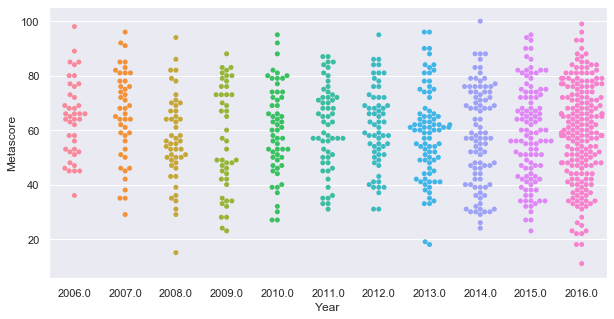

In [17]:
# METASCORE BASED ON YEAR
sns.swarmplot(x="Year", y="Metascore", data=data);
print(' METASCORE BASED ON YEAR')

In [18]:
#RATING ANALYSIS :

data["Rating"].value_counts()

7.0    43
6.7    42
7.1    40
7.8    38
7.2    38
6.6    37
7.3    37
6.3    36
6.5    35
6.2    33
6.8    33
7.5    33
6.4    30
7.4    29
7.6    26
7.7    25
8.1    24
6.9    23
6.1    22
5.8    21
6.0    20
7.9    20
8.0    19
5.7    16
5.9    15
5.6    13
5.5    11
5.4    10
8.2     9
5.3     8
8.5     6
5.2     6
4.9     6
8.3     5
5.1     5
4.3     3
4.7     3
8.6     3
3.9     2
4.6     2
8.4     2
9.0     1
1.9     1
5.0     1
4.0     1
2.7     1
4.8     1
8.8     1
4.4     1
4.1     1
Name: Rating, dtype: int64

In [19]:
# Top 10 rating movies 
Sortedrating = data.sort_values(['Rating'], ascending=False)

In [20]:
# Medium rated movies
medium_rated_movies= data.query('(Rating > 3.0) & (Rating < 7.0)')

Text(0.5, 1, 'MOVIES WITH MEDIUM RATING , METASCORE')

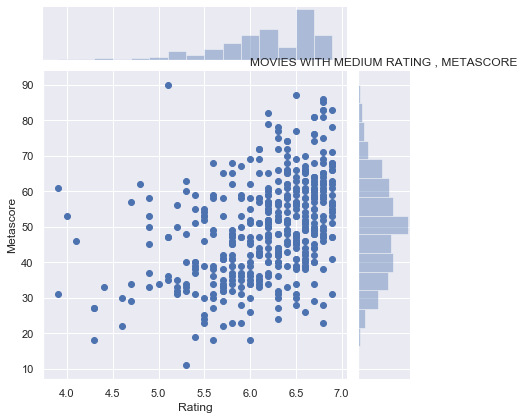

In [21]:
# MOVIES WITH MEDIUM RATING , METASCORE
sns.jointplot(x="Rating", y="Metascore", data=medium_rated_movies);
plt.title('MOVIES WITH MEDIUM RATING , METASCORE')

Text(0.5, 1, 'MOVIES WITH MEDIUM RATING , VOTES')

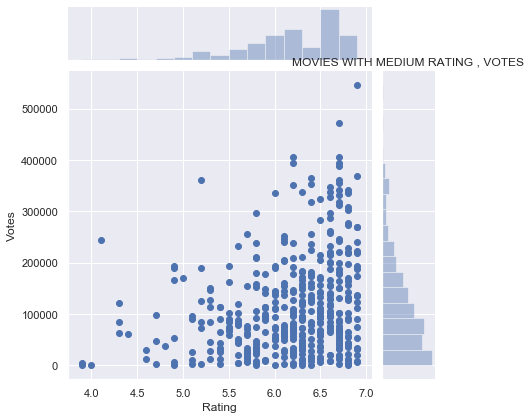

In [22]:
# MOVIES WITH MEDIUM RATING , VOTES
sns.jointplot(x="Rating", y="Votes", data=medium_rated_movies);
plt.title('MOVIES WITH MEDIUM RATING , VOTES')

Text(0.5, 1, 'MOVIES WITH MEDIUM RATING , REVENUE')

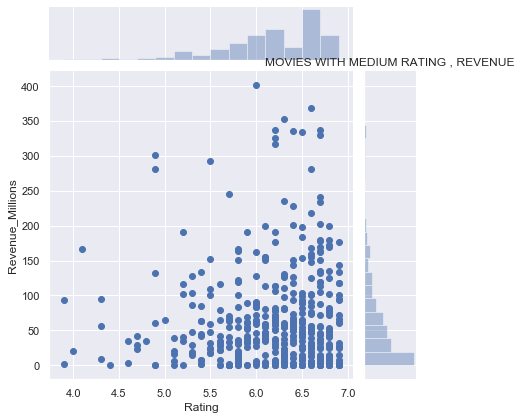

In [23]:
# MOVIES WITH MEDIUM RATING , REVENUE
sns.jointplot(x="Rating", y="Revenue_Millions", data=medium_rated_movies);
plt.title('MOVIES WITH MEDIUM RATING , REVENUE')

In [24]:
high_rated_movies= data.query('(Rating > 7.0) & (Rating < 10.0)')

Text(0.5, 1, 'MOVIES WITH HIGH RATING , METASCORE')

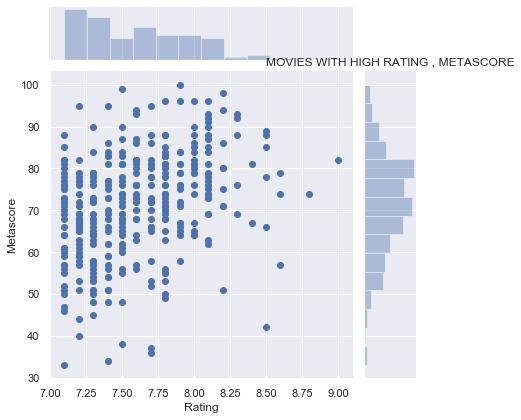

In [25]:
# MOVIES WITH HIGH RATING , METASCORE
sns.jointplot(x="Rating", y="Metascore", data=high_rated_movies);
plt.title('MOVIES WITH HIGH RATING , METASCORE')

Text(0.5, 1, 'MOVIES WITH HIGH RATING ,VOTES')

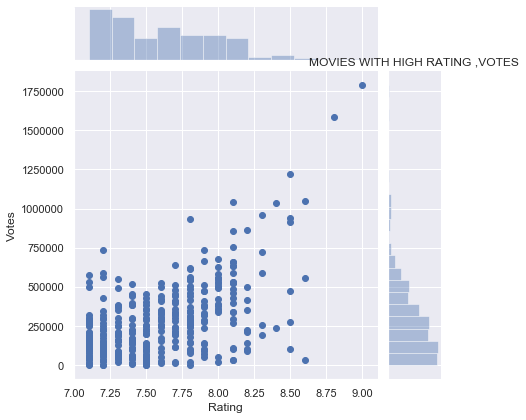

In [26]:
# MOVIES WITH HIGH RATING ,VOTES
sns.jointplot(x="Rating", y="Votes", data=high_rated_movies);
plt.title('MOVIES WITH HIGH RATING ,VOTES')

Text(0.5, 1, 'MOVIES WITH HIGH RATING ,REVENUE')

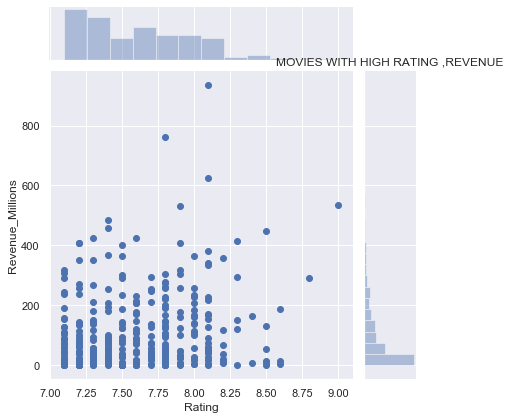

In [27]:
# MOVIES WITH HIGH RATING ,REVENUE
sns.jointplot(x="Rating", y="Revenue_Millions", data=high_rated_movies);
plt.title('MOVIES WITH HIGH RATING ,REVENUE')

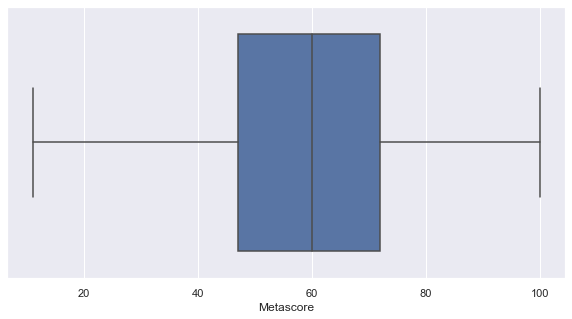

In [28]:
metascore=data.Metascore
sns.boxplot(metascore);

plt.show()

# Data Pre-Processing

In [29]:
data = data.dropna(axis=0, how='any')

In [30]:
# Data for Analysis
X = data[data.columns[6:32]]
y = data.iloc[:,-1]

In [31]:
X.head()

,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Action,Adventure,Aniimation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2014.0,121.0,8.1,757074.0,333.13,76.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2012.0,124.0,7.0,485820.0,126.46,65.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2016.0,117.0,7.3,157606.0,138.12,62.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2016.0,108.0,7.2,60545.0,270.32,59.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016.0,123.0,6.2,393727.0,325.02,40.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Success, dtype: float64

In [33]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [34]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Testing various Classification Algorithms

### 1) K Nearest Neighbors

In [35]:
# Model Training
knn = KNeighborsClassifier(n_neighbors = 5)

In [36]:
# Prediction
y_pred = knn.fit(X_train, y_train).predict(X_test)

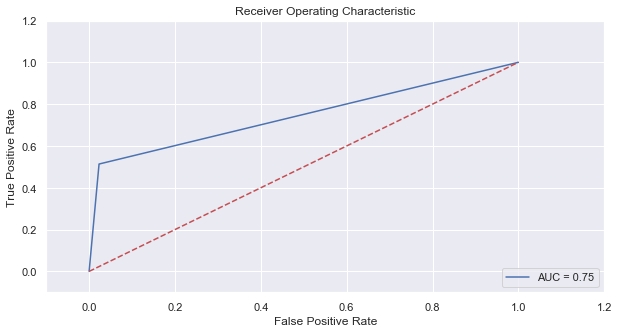

In [37]:
# Model Evaluation
conf_mat = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
# Results
print('Confusion Matrix :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)

Confusion Matrix :
[[169   4]
 [ 18  19]]

Accuracy is :
0.8952380952380953

Precision is :
0.8260869565217391

Recall is: 
0.5135135135135135


## 2) Logistic Regression 

In [39]:
# Model and Training
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Prediction
y_pred = LogReg.predict(X_test)

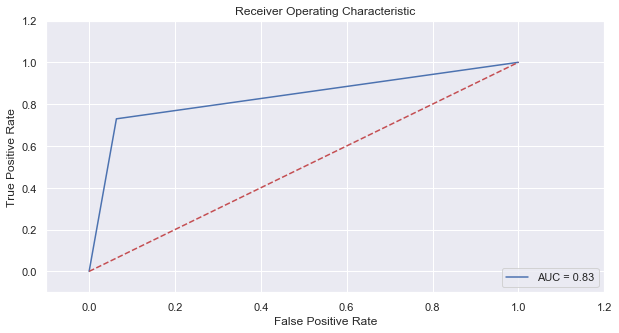

In [41]:
# Model Evaluation
conf_mat = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
# Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)

Confusion Matrix is :
[[162  11]
 [ 10  27]]

Accuracy is :
0.9

Precision is :
0.7105263157894737

Recall is: 
0.7297297297297297


### 3) SVM

In [43]:
# Model and Training
clf = svm.SVC()

# Prediction
y_pred = clf.fit(X_train,y_train).predict(X_test)

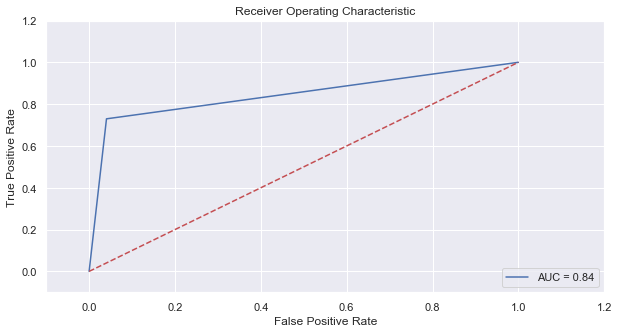

In [44]:
#Model Evaluation
conf_mat = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
# Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)

Confusion Matrix is :
[[166   7]
 [ 10  27]]

Accuracy is :
0.919047619047619

Precision is :
0.7941176470588235

Recall is: 
0.7297297297297297


### 4) Naive Bayes Classifier 

In [46]:
# Model and Training
gnb = GaussianNB()

# Prediction
y_pred = gnb.fit(X_train,y_train).predict(X_test)

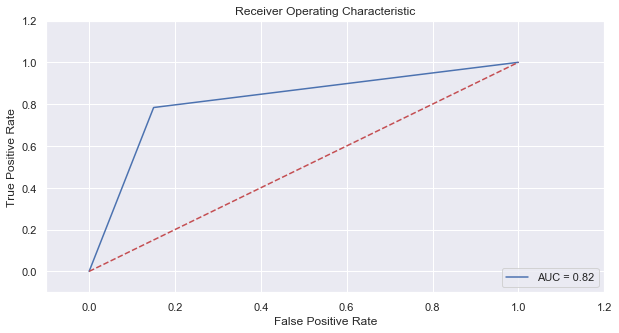

In [47]:
#Model Evaluation
conf_mat = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
# Results
print('Confusion Matrix :')
print(conf_mat)
print('\nAccuracy :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)

Confusion Matrix :
[[147  26]
 [  8  29]]

Accuracy :
0.8380952380952381

Precision is :
0.5272727272727272

Recall is: 
0.7837837837837838


### 5) Adaboost Classifier

In [49]:
# Model and Training
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
adaboost_model.fit(X_train, y_train)

# Prediction
y_pred = adaboost_model.predict(X_test)

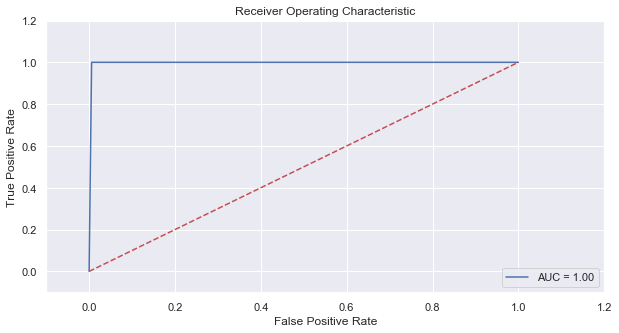

In [50]:
#Model Evaluation
conf_mat = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [51]:
# Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)

Confusion Matrix is :
[[172   1]
 [  0  37]]

Accuracy is :
0.9952380952380953

Precision is :
0.9736842105263158

Recall is: 
1.0


In [52]:
df = [['K Nearest Neighbor', 0.75, 0.8952, 0.8260, 0.5135], 
       ['Logistic Regression', 0.83, 0.9, 0.7105, 0.7297], 
       ['Support Vector Machine', 0.84, 0.9190, 0.7941, 0.7297], 
       ['Naive Bayes', 0.82, 0.8380, 0.5272, 0.7837], 
       ['Adaboost', 1, 0.9952, 0.9736, 1]]



In [53]:
df = pd.DataFrame(df, columns = ['Algorithm', 'AUC', 'Accuracy', 'Precision', 'Recall'])

In [54]:
df

,Algorithm,AUC,Accuracy,Precision,Recall
0,K Nearest Neighbor,0.75,0.8952,0.8260,0.5135
1,Logistic Regression,0.83,0.9000,0.7105,0.7297
2,Support Vector Machine,0.84,0.9190,0.7941,0.7297
3,Naive Bayes,0.82,0.8380,0.5272,0.7837
4,Adaboost,1.00,0.9952,0.9736,1.0000


In [55]:
df.sort_values(by = 'AUC', ascending = False, inplace = False)

,Algorithm,AUC,Accuracy,Precision,Recall
4,Adaboost,1.00,0.9952,0.9736,1.0000
2,Support Vector Machine,0.84,0.9190,0.7941,0.7297
1,Logistic Regression,0.83,0.9000,0.7105,0.7297
3,Naive Bayes,0.82,0.8380,0.5272,0.7837
0,K Nearest Neighbor,0.75,0.8952,0.8260,0.5135


In [56]:
df.sort_values(by = 'Accuracy', ascending = False, inplace = False)

,Algorithm,AUC,Accuracy,Precision,Recall
4,Adaboost,1.00,0.9952,0.9736,1.0000
2,Support Vector Machine,0.84,0.9190,0.7941,0.7297
1,Logistic Regression,0.83,0.9000,0.7105,0.7297
0,K Nearest Neighbor,0.75,0.8952,0.8260,0.5135
3,Naive Bayes,0.82,0.8380,0.5272,0.7837


In [57]:
df.sort_values(by = 'Precision', ascending = False, inplace = False)

,Algorithm,AUC,Accuracy,Precision,Recall
4,Adaboost,1.00,0.9952,0.9736,1.0000
0,K Nearest Neighbor,0.75,0.8952,0.8260,0.5135
2,Support Vector Machine,0.84,0.9190,0.7941,0.7297
1,Logistic Regression,0.83,0.9000,0.7105,0.7297
3,Naive Bayes,0.82,0.8380,0.5272,0.7837


In [58]:
df.sort_values(by = 'Recall', ascending = False, inplace = False)

,Algorithm,AUC,Accuracy,Precision,Recall
4,Adaboost,1.00,0.9952,0.9736,1.0000
3,Naive Bayes,0.82,0.8380,0.5272,0.7837
1,Logistic Regression,0.83,0.9000,0.7105,0.7297
2,Support Vector Machine,0.84,0.9190,0.7941,0.7297
0,K Nearest Neighbor,0.75,0.8952,0.8260,0.5135
